<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/newbreakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [23]:
# @title
!pwd

/content


In [24]:
# @title
##from google.colab import drive
#drive.mount('/content/drive')

### **data cleaning**

In [25]:
# @title
#importing data from github. switched from google drive.
url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding.csv?token=GHSAT0AAAAAACZECXI2TDYOBSF6V7LTK6VOZYRSVXQ' # Changed url to raw data url
df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,cid,uniquecid,...,Disruption labor produced.2,affect-goal,change,Goal changes,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Finance,circ1,S01goal1circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Finance,circ2,S01goal1circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Finance,circ3,S01goal1circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)


In [27]:
# @title
df['pid*gid'] = df['pid'] + "*" + df['gid']

In [28]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption") or
    (x['disruption_labor_aggregated'] in ["No labor- positive disruption"]) or (x['how-long'] in ["No disruption"]) else 'Disruption', axis=1)

# df = df.replace('No response', np.nan)

### **#repeating disruptions for another goal**

In [29]:
a = df['rep-id'].nunique()
print("unique disruptions repeating for another goal:", a)

len(df)

repeatingdf = df[df['rep-id'].notna()]
unique_disruptions = (len(df) - len(repeatingdf)) + a
print("non-unique disruptions repeating for another goal:", len(repeatingdf))
print("total unique disruptions are:", unique_disruptions)

unique disruptions repeating for another goal: 38
non-unique disruptions repeating for another goal: 83
total unique disruptions are: 717


### **#goals for each goal type**

**How many goals were reported under each type of goal category?**

* goal categories with count of goals- per participant per goal statement (Number of goals (gid) under each goal category)
  * **DONE** - Table
  * **DONE** - Bar chart   
* **YES** - unique Identifier for each goal: gid*pid
* **TRUE** - Validation- sum of all goals should be 433


In [30]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

goals_each_category = df_goalcategories.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category, total_row], ignore_index=True)

In [31]:
# @title
goals_each_category

,goal_categories,count of goals
0,Finance,83
1,Mental health and wellbeing,62
2,Physical Activity,58
3,Nutrition,38
4,Weight management,38
5,Work/Career,35
6,Social connection,29
7,Other,25
8,Health - other,24
9,Education/Learning,18


same as above but combining some goal categories

In [32]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

df_goalcategories['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

goals_each_category = df_goalcategories.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category, total_row], ignore_index=True)

goals_each_category

<ipython-input-32-9d78f945de62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count of goals
0,Finance,83
1,Mental health and wellbeing,62
2,Physical Activity,58
3,Work/Education,53
4,Nutrition,38
5,Weight management,38
6,Health - other,33
7,Social connection,29
8,Other,25
9,Recreation,14


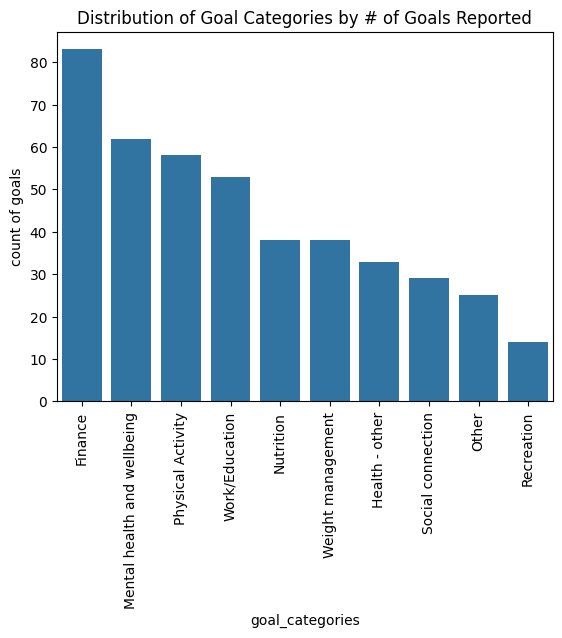

In [33]:
# @title
sns.barplot(x='goal_categories', y='count of goals', data=goals_each_category_graph)
plt.title('Distribution of Goal Categories by # of Goals Reported')
plt.xticks(rotation=90)


plt.show()

### **#goals by goal scope**

What types of goal categories have a lot more short/medium term goals? What types of goal categories have more equal distribution of short term vs aspirational goals?

Not going in paper as-is but for descriptive text and later analysis- (note for Mehreen- regen the table but don’t spend too much brain cells on interpreting it)

While physical activity goals are mostly short/medium terms goals, mental health and well-being and social connection goals have a lot of aspirational sounding goals. Later on it might be interesting to see distribution of disruptions by goal scopes– are aspirational goals more or less likely to be disrupted? I’m guessing short/medium terms goals are more often “skipped”  


In [34]:
# @title
df_goalcategories_scope = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

goals_each_scope = df_goalcategories_scope.drop_duplicates(subset = 'pid*gid')

# goals_each_scope['pid*gid'].nunique()
goals_each_scope['goal_scope'].unique()
goals_each_scope.fillna('No response', inplace=True)

# Create a pivot table with 'Goal categories' as index, 'Goal scope' as columns, and aggregated 'circumstance'
pivot_table = goals_each_scope.pivot_table(
    index='goal_categories',
    columns='goal_scope',
    aggfunc='size',
    fill_value=0
)

x = pivot_table.reset_index()
x
# x['total'] = x.sum(numeric_only=True, axis=1)
# x['total'].sum()

<ipython-input-34-ffd1209d09f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals_each_scope.fillna('No response', inplace=True)


goal_scope,goal_categories,Aspirational,Long term,Medium term
0,Education/Learning,2,1,15
1,Finance,0,54,29
2,Health - other,0,14,10
3,Manage chronic condition,0,0,3
4,Mental health and wellbeing,15,13,34
5,Nutrition,1,1,36
6,Other,3,3,19
7,Physical Activity,0,9,49
8,Recreation,0,3,11
9,Sleep,0,0,6


### **#participants by goal type:👍**




**What types of goals were most commonly and least commonly reported by participants?  **
* goal categories with count of participants
  * **DONE** -  Table
  * **DONE** - bar chart

In [35]:
# @title
unique_goals = df_goalcategories[['pid', 'goal_categories']].drop_duplicates()

pivot_table = unique_goals.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

pivot_table

sortedgoalcategories = pivot_table.reset_index()

sortedgoalcategories.rename(columns={0: 'count of participants'}, inplace=True)

sortedgoalcategories.sort_values(by='count of participants', ascending=False, inplace=True)

sortedgoalcategoriesforgraph = sortedgoalcategories

# # prompt: Using dataframe sortedgoalcategories: add a total for the column count to the dataframe

# Calculate the total count
total_count = sortedgoalcategories['count of participants'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of participants': [total_count]})

# Concatenate the original DataFrame and the total row
sortedgoalcategories = pd.concat([sortedgoalcategories, total_row], ignore_index=True)


disruption_data = df[df['disruption_status'] == 'Disruption']



In [36]:
# @title
sortedgoalcategories

,goal_categories,count of participants
0,Finance,67
1,Physical Activity,57
2,Mental health and wellbeing,52
3,Work/Education,49
4,Weight management,38
5,Nutrition,37
6,Social connection,28
7,Health - other,27
8,Other,23
9,Recreation,12


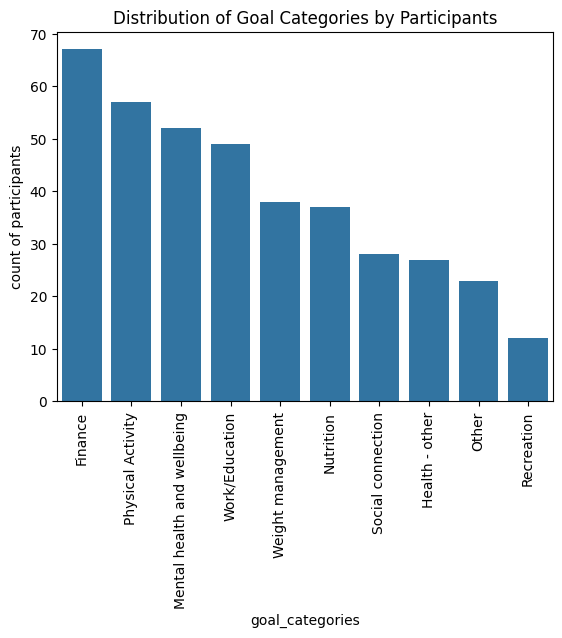

In [37]:
# @title
sns.barplot(x='goal_categories', y='count of participants', data=sortedgoalcategoriesforgraph)
plt.title('Distribution of Goal Categories by Participants')
plt.xticks(rotation=90)
plt.show()

### **#disruption types**

note -- % left

**What types of disruptions were most and least commonly reported by participants?**

* **YES** - Out of 762 reported disruptions, XXX (ZZ%) were financial disruptions, XXX (ZZ%) were internal-feelings and thoughts, etc.
* **YES** - This is not unique
* **YES** - Table of disruption categories (situations that occurred) with number of disruptions reported under each category
  * **PENDING** - in third column report number as a % of the total disruptions.
* **Validation:**
  * **YES** - total number of disruptions should be 708,
  * **PENDING** - total % should be 100
* **Filters:** filter out rows with:
  * **YES** - disruption = “no disruption”
  * **YES** - OR labor produced = No labor- positive disruption,
  * **YES** - OR "how-long" = no-disruption
  * **YES** - include rows with disruption labor = no response because it is still a disruption


In [38]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']

pivot_table = disruption_data.pivot_table(
    index='situation_that_occurred',
    aggfunc='size',
    fill_value=0
)

pivot_table = pivot_table.reset_index()
pivot_table.rename(columns={0: 'non-unique #situations reported'}, inplace=True)
pivot_table.sort_values(by='non-unique #situations reported', ascending=False, inplace=True)
pivot_table


# Calculate the total count
total_count = pivot_table['non-unique #situations reported'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'non-unique #situations reported': [total_count]})

# Concatenate the original DataFrame and the total row
pivot_table = pd.concat([pivot_table, total_row], ignore_index=True)

pivot_table

,situation_that_occurred,non-unique #situations reported
0,Internal - Feelings and thoughts,137
1,Finances,119
2,Work,75
3,Social interaction - other,63
4,Resources,60
5,Pain,45
6,Social interactions - negative,32
7,Weather,22
8,Health,22
9,Caregiving,19


same table as above but combined some categories

In [39]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
temp_df = disruption_data

temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
    'Internal-Skills': 'Internal- Emotional and Cognitive',
    'Internal - Feelings and thoughts': 'Internal- Emotional and Cognitive',
    'Social interaction - other': 'Social interaction',
    'Social interactions - negative': 'Social interaction',
    'Pain': 'Health',
    'Entertainment': 'Recreation',
    'Travel': 'Recreation',
    'Housework': 'Family and home responsibilities',
    'Caregiving': 'Family and home responsibilities',
    'Diet': 'Eating and sleeping issues',
    'Sleep': 'Eating and sleeping issues',
    'Transportation': 'Resources',
})
pivot_table = temp_df.pivot_table(
    index='situation_that_occurred',
    aggfunc='size',
    fill_value=0
)

pivot_table = pivot_table.reset_index()
pivot_table.rename(columns={0: 'non-unique #situations reported'}, inplace=True)
pivot_table.sort_values(by='non-unique #situations reported', ascending=False, inplace=True)
pivot_table


# Calculate the total count
total_count = pivot_table['non-unique #situations reported'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'situation_that_occurred': ['Total'], 'non-unique #situations reported': [total_count]})

# Concatenate the original DataFrame and the total row
pivot_table = pd.concat([pivot_table, total_row], ignore_index=True)

pivot_table

<ipython-input-39-ec94cb981a7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({


,situation_that_occurred,non-unique #situations reported
0,Internal- Emotional and Cognitive,141
1,Finances,119
2,Social interaction,95
3,Work,75
4,Health,67
5,Resources,67
6,Eating and sleeping issues,35
7,Recreation,32
8,Family and home responsibilities,23
9,Weather,22


### #**disruptions by goal type**






Which goal categories had most and least number of disruptions as reported by participants?

goal categories with number of disruptions under each category:
  * **DONE** - Table
  * **DONE** - and bar chart of
* **YES** - INCLUDING life event disruptions and pre-existing disruptions
* **YES** - Validation: total number of disruptions should be 708
* **YES** - Unique identifier: pid*gid*cid,
* Filters: filter out rows with
  * **DONE** - disruption = “no disruption”
  * **DONE** - OR labor produced = No labor- positive disruption,
  * **DONE** - OR "how-long" = no-disruption
  * **DONE** - include rows with disruption labor = no response because it is still a disruption


In [40]:
# @title
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_by_goal_type = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'circumstance', 'situation_that_occurred', 'disruption_status', 'life_event?', 'pre-existing?']]

In [41]:
# @title
# filter out no disruptions

disruptions_by_goal_type = disruptions_by_goal_type[disruptions_by_goal_type['disruption_status'] == 'Disruption']

# no duplicates

# disruptions_by_goal_type = disruptions_by_goal_type.drop_duplicates(subset = ['pid*gid*cid'])
# len(disruptions_by_goal_type['pid*gid*cid'])

disruption_by_category = disruptions_by_goal_type.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_by_goal_type['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category
# disruption_by_category['count'].sum()

# disruption_by_category = disruptions_by_goal_type.groupby(['goal_categories', 'disruption_status']).size().unstack(fill_value=0)
# disruption_by_category


,goal_categories,count
0,Finance,133
1,Mental health and wellbeing,95
2,Physical Activity,89
3,Weight management,80
4,Work/Career,60
5,Nutrition,59
6,Social connection,56
7,Health - other,41
8,Other,37
9,Education/Learning,27


In [42]:
# @title
# disruption_by_category.to_csv('/content/dr ive/MyDrive/.ipynb_checkpoints/disruption_by_goal_type.csv', index=False)

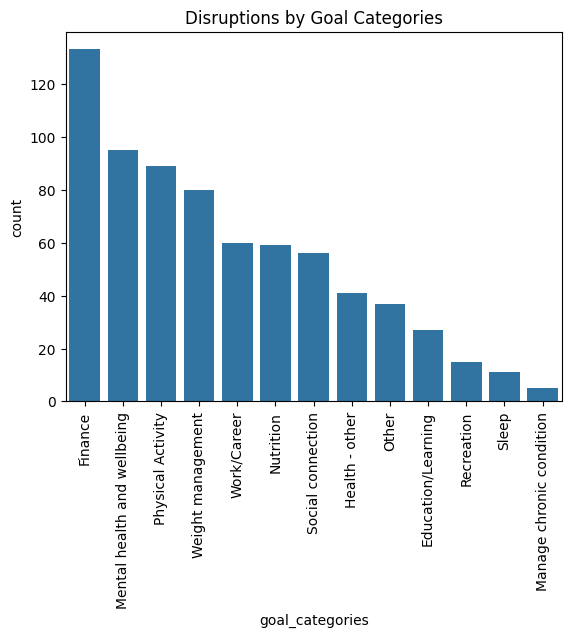

In [43]:
# @title
# Plot the bar chart

sns.barplot(x='goal_categories', y='count', data=disruption_by_category)
plt.title('Disruptions by Goal Categories')
plt.xticks(rotation=90)
plt.show()

* **YES** Create another version of the above table but with 2 extra columns. No need for any chart
* **YES** Column 1: Label “Life events disruptions”
  * **YES** goal categories with number of life events under each category
  * Filters:
    * filter out rows with
      * **YES** - disruption = “no disruption”
      * **YES** - OR labor produced = No labor- positive disruption
      * **YES** - OR "how-long" = "no disruption"
      * **YES** OR life events = no
      * **YES** include disruption labor = no response because it is still a disruption
* **YES** Column 2: Label “Barriers”
  * **YES** goal categories with number of pre-existing disruptions under each category
  * Filters:
    * filter out rows with
      * **YES** disruption = “no disruption”
      * **YES**  OR labor produced = No labor- positive disruption
      * **YES** OR "how-long" = "no disruption"
      * **YES** OR pre-existing = no
      * **YES** include disruption labor = no response because it is still a disruption





In [44]:
# @title
# filter out no disruptions

disruptions_by_goal_type = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'circumstance', 'situation_that_occurred', 'disruption_status', 'life_event?', 'pre-existing?']]

disruptions_by_goal_type = disruptions_by_goal_type[disruptions_by_goal_type['disruption_status'] == 'Disruption']

disruption_life_events = disruptions_by_goal_type.groupby(['goal_categories', 'life_event?']).size().unstack(fill_value=0)
disruption_life_events = disruption_life_events.reset_index()
disruption_life_events = disruption_life_events.drop(columns=['No'])
disruption_life_events.rename(columns={'Yes': 'life_events_disruptions'}, inplace=True)

# disruption_life_events


In [45]:
# @title
# filter out no disruptions
disruptions_by_goal_type = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'circumstance', 'situation_that_occurred', 'disruption_status', 'life_event?', 'pre-existing?']]

disruptions_by_goal_type = disruptions_by_goal_type[disruptions_by_goal_type['disruption_status'] == 'Disruption']


disruption_preexisting = disruptions_by_goal_type.groupby(['goal_categories', 'pre-existing?']).size().unstack(fill_value=0)
disruption_preexisting = disruption_preexisting.reset_index()
disruption_preexisting = disruption_preexisting.drop(columns=['No'])
disruption_preexisting.rename(columns={'Yes': 'barriers'}, inplace=True)

# disruption_preexisting


In [46]:
# @title
disruption_by_category = disruption_by_category.sort_values(by='goal_categories')
disruption_life_events = disruption_life_events.sort_values(by='goal_categories')
disruption_preexisting = disruption_preexisting.sort_values(by='goal_categories')

disruption_by_category['life_events_disruptions'] = disruption_life_events['life_events_disruptions']
disruption_by_category['barriers'] = disruption_preexisting['barriers']
disruption_by_category = disruption_by_category.sort_values(by='count', ascending= False)
disruption_by_category

,goal_categories,count,life_events_disruptions,barriers
0,Finance,133,0,5
1,Mental health and wellbeing,95,7,22
2,Physical Activity,89,2,6
3,Weight management,80,3,3
4,Work/Career,60,4,14
5,Nutrition,59,0,7
6,Social connection,56,1,10
7,Health - other,41,2,10
8,Other,37,0,2
9,Education/Learning,27,0,0


### **#disruptions of each type by goal type (how many disurptions of each type we see for exercise goals, for mental health goals, etc)**

In [47]:
# @title
disruptions_by_goal_type = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'circumstance', 'situation_that_occurred', 'disruption_status', 'life_event?', 'pre-existing?']]

disruptions_by_goal_type = disruptions_by_goal_type[disruptions_by_goal_type['disruption_status'] == 'Disruption']


disruption_by_category = disruptions_by_goal_type.groupby(['goal_categories', 'situation_that_occurred']).size().unstack(fill_value=0)
disruption_by_category

situation_that_occurred,Caregiving,Diet,Employment,Entertainment,Finances,Health,Housework,Internal - Feelings and thoughts,Internal-Skills,Other,Pain,Resources,Sleep,Social interaction - other,Social interactions - negative,Transportation,Travel,Weather,Work
goal_categories,,,,,,,,,,,,,,,,,,,
Education/Learning,0,0,0,4,1,1,2,11,0,0,0,3,0,2,0,0,0,0,3
Finance,2,0,6,2,84,4,0,7,1,2,5,6,0,3,3,1,3,0,4
Health - other,1,6,1,0,6,2,0,3,0,2,6,3,1,3,0,1,1,3,2
Manage chronic condition,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
Mental health and wellbeing,3,0,0,5,5,0,0,25,0,2,1,6,6,10,19,0,0,1,12
Nutrition,0,4,0,0,3,1,0,16,1,1,2,13,1,9,2,0,2,0,4
Other,2,0,1,1,4,0,0,8,0,1,2,5,2,2,1,0,0,0,8
Physical Activity,3,1,0,1,0,6,0,16,0,3,19,2,3,6,0,1,3,10,15
Recreation,0,0,0,0,7,0,0,1,0,1,0,2,0,0,0,0,0,3,1


### **#participants of each disruptions type by goal type (how many participants reported a specific disruption type for exercise goals, for mental health goals, etc)**

In [48]:
# @title
disruptions_by_goal_type = df[['pid', 'goal_categories', 'situation_that_occurred', 'disruption_status']]

disruptions_by_goal_type = disruptions_by_goal_type[disruptions_by_goal_type['disruption_status'] == 'Disruption']

disruptions_by_goal_type['situation_that_occurred'] = disruptions_by_goal_type['situation_that_occurred'].replace({
    'Internal-Skills': 'Internal- Emotional and Cognitive',
    'Internal - Feelings and thoughts': 'Internal- Emotional and Cognitive',
    'Social interaction - other': 'Social interaction',
    'Social interactions - negative': 'Social interaction',
    'Pain': 'Health',
    'Entertainment': 'Recreation',
    'Travel': 'Recreation',
    'Housework': 'Family and home responsibilities',
    'Caregiving': 'Family and home responsibilities',
    'Diet': 'Eating and sleeping issues',
    'Sleep': 'Eating and sleeping issues',
    'Transportation': 'Resources',
})

disruptions_by_goal_type

disruption_by_category = disruptions_by_goal_type.groupby(['goal_categories', 'situation_that_occurred']).size().unstack(fill_value=0)
disruption_by_category

situation_that_occurred,Eating and sleeping issues,Employment,Family and home responsibilities,Finances,Health,Internal- Emotional and Cognitive,Other,Recreation,Resources,Social interaction,Weather,Work
goal_categories,,,,,,,,,,,,
Education/Learning,0,0,2,1,1,11,0,4,3,2,0,3
Finance,0,6,2,84,9,8,2,5,7,6,0,4
Health - other,7,1,1,6,8,3,2,1,4,3,3,2
Manage chronic condition,2,0,0,0,1,1,0,0,0,1,0,0
Mental health and wellbeing,6,0,3,5,1,25,2,5,6,29,1,12
Nutrition,5,0,0,3,3,17,1,2,13,11,0,4
Other,2,1,2,4,2,8,1,1,5,3,0,8
Physical Activity,4,0,3,0,25,16,3,4,3,6,10,15
Recreation,0,0,0,7,0,1,1,0,2,0,3,1



### **#disruptions by disruption frequency**

note -- % left

* **YES** - Out of 762 disruptions, XX (ZZ%) were daily disruptions, YY (ZZ%) were weekly disruptions l etc.
* frequency with number of disruptions reported under each category,
  * **YES** - Table
  * **YES** - and bar chart
  * **PENDING** - in the third column report number as a % of the total disruptions.
* Validation:
  * **YES** - total number of disruptions should be 693,
  * **PENDING** - total % should be 100.
* Filters: filter out rows with
  * **YES** - disruption = “no disruption”
  * **YES** OR labor produced = No labor- positive disruption,
  * **YES** OR “how-long” = no disruption
  * **YES** include rows with disruption labor = no response because it is still a disruption,
  * **YES** filter out rows with frequency= “no response”
*  **YES** - Sort table based on frequency order – most often to least often (don’t sort by # of disruptions)  



In [49]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']

frequency_distribution = disruption_data.groupby('frequency').size()
frequency_distribution = frequency_distribution.reset_index(name='count_of_disruptions')

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

# Convert 'frequency' to a categorical type with the custom order
frequency_distribution['frequency'] = pd.Categorical(frequency_distribution['frequency'], categories=frequency_order, ordered=True)

# Sort by the custom frequency order
frequency_distribution = frequency_distribution.sort_values(by='frequency')
frequency_distribution

,frequency,count_of_disruptions
0,daily,195
4,weekly,178
2,every other week,72
3,monthly,134
1,every 6 months,62
5,yearly or less,52


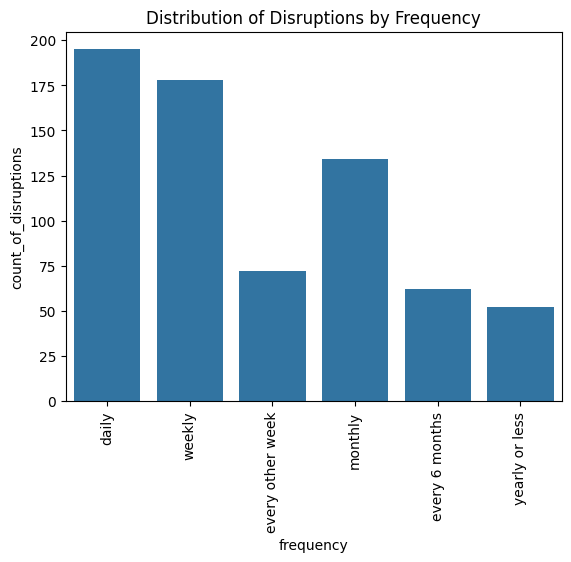

In [50]:
# @title
sns.barplot(x='frequency', y='count_of_disruptions', data=frequency_distribution)
plt.title('Distribution of Disruptions by Frequency')
plt.xticks(rotation=90)
plt.show()

### **#disruptions by disruption frequency for each type of disruption (are some disruptions more common):**

note -- cant find in *document*

In [51]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

situation_frequency = disruption_data.groupby(['situation_that_occurred', 'frequency']).size().unstack(fill_value=0)
# situation_frequency['total'] = situation_frequency.sum(numeric_only=True, axis=1)
# situation_frequency['total'].sum()
situation_frequency = situation_frequency[frequency_order]
situation_frequency

frequency,daily,weekly,every other week,monthly,every 6 months,yearly or less
situation_that_occurred,,,,,,
Caregiving,7,2,1,0,1,3
Diet,5,3,1,3,3,1
Employment,6,4,0,1,1,1
Entertainment,3,3,0,4,1,2
Finances,9,7,9,27,17,17
Health,3,1,0,3,1,4
Housework,0,1,1,2,0,0
Internal - Feelings and thoughts,47,44,6,13,3,2
Internal-Skills,1,0,0,0,0,0


**### # disruptions by disruption frequency for each type of goal (are certain disruptions impacting certain goals)👍**

 note -- % left


* How common were different disruption frequencies across goal categories?
XX% of disruptions affect financial goals. Of the XX% disruptions affecting financial goals, Y% are weekly disruptions, Y% are daily disruptions etc.
* Validation -
  * sum of all percentages for (goal categories) will be 100% (financial + physical activity etc.)
  * sum of all percentages for (goal categories*frequency) will be 100%
* Table of count of disruption ( as a % of total disruptions) for goal categories vs disruption duration with under each category EXCLUDING pre-existing disruptions
* Filters: filter out rows with
    * **YES** - EXCLUDING pre-existing disruptions
    * **YES** - disruption = “no disruption”
    * **YES** - OR labor produced = No labor- positive disruption,
    * **YES** - OR - "how-long" = no disruption
    * **YES** - exclude changes= “no response” OR “other”,
    * **YES** - exclude frequency =”no response

* 🟣 EA 0909-10am: current analysis takeaway:
    * more finances disruptions are monthly (probably related to wages)
    * mental health and wellbeing is overwhelmingly daily and weekly
    * work seems to have some daily disruptions (not sure what they are)
    * weight also seems to skew to daily
  



In [52]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

goaltype_frequency = disruption_data.groupby(['goal_categories', 'frequency']).size().unstack(fill_value=0)
# situation_frequency['total'] = situation_frequency.sum(numeric_only=True, axis=1)
# situation_frequency['total'].sum()
goaltype_frequency = goaltype_frequency[frequency_order]
goaltype_frequency

frequency,daily,weekly,every other week,monthly,every 6 months,yearly or less
goal_categories,,,,,,
Education/Learning,2,7,3,7,3,0
Finance,16,11,9,30,15,25
Health - other,6,8,5,9,4,3
Manage chronic condition,0,0,0,0,2,0
Mental health and wellbeing,25,26,11,10,4,2
Nutrition,10,15,6,10,3,3
Other,9,5,3,6,1,2
Physical Activity,14,22,16,14,5,4
Recreation,2,3,0,2,4,2


### **#disruptions by disruption duration**

note -- % left

* **YES** - Out of 762 disruptions, XX (ZZ%) reported disruptions lasting less than an hour, YY (ZZ%) reported disruptions lasting half a day etc.
* **YES** - Table of duration (how long) with number of disruptions reported under each category,
* **PENDING** - in the third column report number as a % of the total disruptions.
* Validation:
  * **PENDING** - total % should be 100.
* Filters: filter out rows with
  * **YES** - disruption = “no disruption”
  * **YES** - OR labor produced = No labor- positive disruption,
  * **YES** - OR how-long = no disruption
  * **YES** - include rows with disruption labor = no response because it is still a disruption,
  * **YES** filter out rows with how-long = “no response”
* **YES** - Sort table based on duration order – smallest duration to longest (don’t sort by # of participants)


In [53]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']

duration_distribution = disruption_data.groupby('how-long').size()
duration_distribution = duration_distribution.reset_index(name='count_of_disruptions')
duration_distribution['count_of_disruptions'].sum()

duration_order = ['an hour or less', 'more than an hour to half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

duration_distribution['how-long'] = pd.Categorical(duration_distribution['how-long'], categories=duration_order, ordered=True)
duration_distribution = duration_distribution.sort_values(by='how-long')
duration_distribution


,how-long,count_of_disruptions
0,an hour or less,43
2,more than an hour to half a day,79
3,more than half a day to a day,84
4,multiple days to a week,164
6,multiple weeks to a month,109
5,multiple months to a year,115
1,longer than a year,99


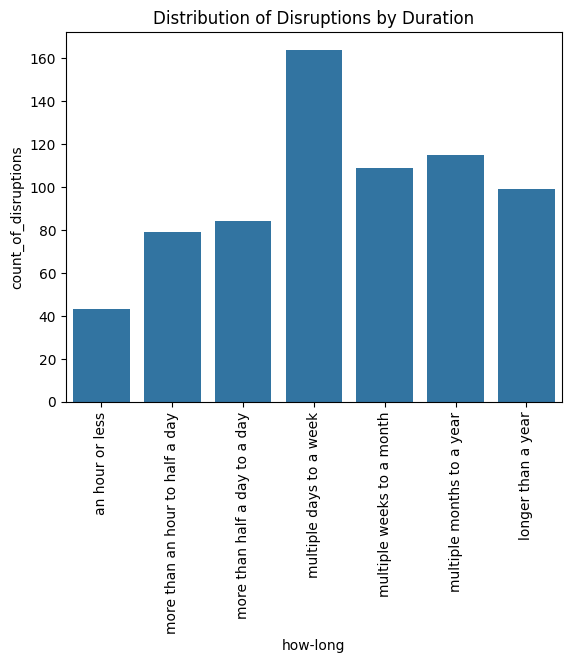

In [54]:
# @title
sns.barplot(x='how-long', y='count_of_disruptions', data=duration_distribution)
plt.title('Distribution of Disruptions by Duration')
plt.xticks(rotation=90)
plt.show()

**Generate the above table but combine less than an hour + more than an hour but less than half a day.**


In [55]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']

temp_df = disruption_data

temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'half a day',
    'more than an hour to half a day': 'half a day',
})

duration_distribution = temp_df.groupby('how-long').size()
duration_distribution = duration_distribution.reset_index(name='count_of_disruptions')
duration_distribution['count_of_disruptions'].sum()
# duration_distribution

duration_order = ['half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

duration_distribution['how-long'] = pd.Categorical(duration_distribution['how-long'], categories=duration_order, ordered=True)
duration_distribution = duration_distribution.sort_values(by='how-long')
duration_distribution

,how-long,count_of_disruptions
0,half a day,122
2,more than half a day to a day,84
3,multiple days to a week,164
5,multiple weeks to a month,109
4,multiple months to a year,115
1,longer than a year,99


**Generate the above table but combine less than an hour + more than an hour to half a day + more than half a day to a day**

In [56]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']

temp_df = disruption_data

temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'a day',
    'more than an hour to half a day': 'a day',
    'more than half a day to a day': 'a day',
})

duration_distribution = temp_df.groupby('how-long').size()
duration_distribution = duration_distribution.reset_index(name='count_of_disruptions')
duration_distribution['count_of_disruptions'].sum()
# duration_distribution

duration_order = ['a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

duration_distribution['how-long'] = pd.Categorical(duration_distribution['how-long'], categories=duration_order, ordered=True)
duration_distribution = duration_distribution.sort_values(by='how-long')
duration_distribution

<ipython-input-56-a151e87a87a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['how-long'] = temp_df['how-long'].replace({


,how-long,count_of_disruptions
0,a day,206
2,multiple days to a week,164
4,multiple weeks to a month,109
3,multiple months to a year,115
1,longer than a year,99


### **#disruptions by disruption duration for each type of disruption (are some disruptions more impactful)**

note -- not in document

In [57]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
# disruption_data = disruption_data.drop_duplicates(subset = ['pid*gid*cid'])

temp_df = disruption_data

temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'half a day',
    'more than an hour to half a day': 'half a day',
    'multiple months to a year':'longer than 6 months',
    'longer than a year':'longer than 6 months',
})

#duration_order = ['an hour or less', 'more than an hour to half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']
duration_order = ['half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'longer than 6 months']


disruption_duration_by_situation = disruption_data.groupby(['situation_that_occurred', 'how-long']).size().unstack(fill_value=0)
# disruption_duration_by_situation['total'] = disruption_duration_by_situation.sum(numeric_only=True, axis=1)
# disruption_duration_by_situation['total'].sum()
disruption_duration_by_situation = disruption_duration_by_situation[duration_order]
disruption_duration_by_situation


how-long,half a day,more than half a day to a day,multiple days to a week,multiple weeks to a month,longer than 6 months
situation_that_occurred,,,,,
Caregiving,1,1,4,2,6
Diet,1,6,3,3,3
Employment,0,0,3,2,8
Entertainment,5,1,2,3,2
Finances,5,3,14,25,39
Health,0,2,4,1,5
Housework,1,2,1,0,0
Internal - Feelings and thoughts,21,16,35,17,26
Internal-Skills,1,0,0,0,0


In [58]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']

temp_df = disruption_data

temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'half a day',
    'more than an hour to half a day': 'half a day',
})

duration_order = ['half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']


situation_duration = temp_df.groupby(['situation_that_occurred', 'how-long']).size().unstack(fill_value=0)
situation_duration = situation_duration[duration_order]
# situation_duration['total'] = situation_duration.sum(numeric_only=True, axis=1)
# situation_duration['total'].sum()
situation_duration

how-long,half a day,more than half a day to a day,multiple days to a week,multiple weeks to a month,multiple months to a year,longer than a year
situation_that_occurred,,,,,,
Caregiving,1,1,4,2,2,4
Diet,1,6,3,3,2,1
Employment,0,0,3,2,5,3
Entertainment,5,1,2,3,2,0
Finances,5,3,14,25,25,14
Health,0,2,4,1,4,1
Housework,1,2,1,0,0,0
Internal - Feelings and thoughts,21,16,35,17,13,13
Internal-Skills,1,0,0,0,0,0


In [59]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']

temp_df = disruption_data

temp_df['how-long'] = temp_df['how-long'].replace({
    'an hour or less': 'a day',
    'more than an hour to half a day': 'a day',
    'more than half a day to a day': 'a day',
})

duration_order = ['a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

situation_duration = temp_df.groupby(['situation_that_occurred', 'how-long']).size().unstack(fill_value=0)
situation_duration = situation_duration[duration_order]

# situation_duration['total'] = situation_duration.sum(numeric_only=True, axis=1)
# situation_duration['total'].sum()
situation_duration

how-long,a day,multiple days to a week,multiple weeks to a month,multiple months to a year,longer than a year
situation_that_occurred,,,,,
Caregiving,2,4,2,2,4
Diet,7,3,3,2,1
Employment,0,3,2,5,3
Entertainment,6,2,3,2,0
Finances,8,14,25,25,14
Health,2,4,1,4,1
Housework,3,1,0,0,0
Internal - Feelings and thoughts,37,35,17,13,13
Internal-Skills,1,0,0,0,0


###  #disruptions by disruption duration for each type of goal (are certain disruptions impacting certain goals) 👍

---



note -- % left


How common were different disruption durations across goal categories?

**YES** - XX% of disruptions affect financial goals. Of the XX% disruptions affecting financial goals, Y% disruptions last less than a day, Y% disruptions last less than a week etc. XX% affect physical activity goals. Of the XX% disruptions affecting physical activity goals, Y% disruptions last less than a day, Y% disruptions last less than a week etc.
* Validation
  * sum of all percentages for (goal categories) will be 100% (financial + physical activity etc.)
  * sum of all percentages for (goal categories*duration) will be 100%
* **YES** - Table of count of disruption ( as a % of total disruptions) for goal categories vs disruption duration with under each category
  * **YES** - EXCLUDING pre-existing disruptions
* Filters: filter out rows with
  * **YES** - disruption = “no disruption”
  * **YES** - OR labor produced = No labor- positive disruption,
  * **YES** - OR how long = no disruption
  * **YES** - exclude changes= “no response” OR “other”,
  * **YES** - exclude duration =”no response”


In [60]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
# disruption_data = disruption_data.drop_duplicates(subset = ['pid*gid*cid'])


duration_order = ['an hour or less', 'more than an hour to half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']


disruption_frequency_by_goal = disruption_data.groupby(['goal_categories', 'how-long']).size().unstack(fill_value=0)
disruption_frequency_by_goal = disruption_frequency_by_goal[duration_order]

# disruption_frequency_by_goal['total'] = disruption_frequency_by_goal.sum(numeric_only=True, axis=1)
# disruption_frequency_by_goal['total'].sum()
disruption_frequency_by_goal


how-long,an hour or less,more than an hour to half a day,more than half a day to a day,multiple days to a week,multiple weeks to a month,multiple months to a year,longer than a year
goal_categories,,,,,,,
Education/Learning,2,7,6,0,2,5,0
Finance,3,1,7,20,29,27,19
Health - other,1,2,9,11,3,8,1
Manage chronic condition,0,0,2,0,0,0,0
Mental health and wellbeing,12,11,7,23,7,6,12
Nutrition,2,10,7,15,5,3,5
Other,2,6,2,2,6,4,4
Physical Activity,4,13,17,25,8,4,4
Recreation,0,0,0,3,2,7,1


### **#disruptions by type of labor**

note -- % left

**What types of burden were most and least commonly reported?**

Out of 762 disruptions, XX (ZZ%) produced physical burden only, YY (ZZ%) were physical and emotional burden, XX (ZZ%) produced physical, emotional and financial burden etc.

frequency with number of disruptions reported under each category,
* **YES** - Table and
* **YES** - bar chart   
* in the third column report number as a % of the total disruptions.
* Validation:
  * total number of disruptions should be 762,
  * total % should be 100.
* **YES** - Filters: filter out rows with
  * **YES** - disruption = “no disruption”
  * **YES** - OR labor produced = No labor- positive disruption,
  * **YES** - OR how-long = no disruption,
  * **YES** - disruption labor = no response

  note - total will be more than 762, as a single disruption produced multiple labor


In [61]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']


# Now let's explode this column to ensure each disruption labor type is in a single row
survey_data_exploded = disruption_data.assign(disruption_labor_split=disruption_data['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')

survey_data_exploded
survey_data_exploded[['pid', 'situation_that_occurred', 'disruption_labor_split']]
survey_data_exploded

survey_data_exploded = survey_data_exploded[survey_data_exploded['disruption_labor_split'] != 'No response']

burden_distribution = survey_data_exploded.groupby('disruption_labor_split').size()
burden_distribution = burden_distribution.reset_index(name='count_of_disruptions')

burden_distribution = burden_distribution.sort_values(by='count_of_disruptions', ascending=False)
burden_distribution



,disruption_labor_split,count_of_disruptions
0,Emotional,523
2,Logistical,127
4,Physical,90
1,Financial,63
3,Other,2


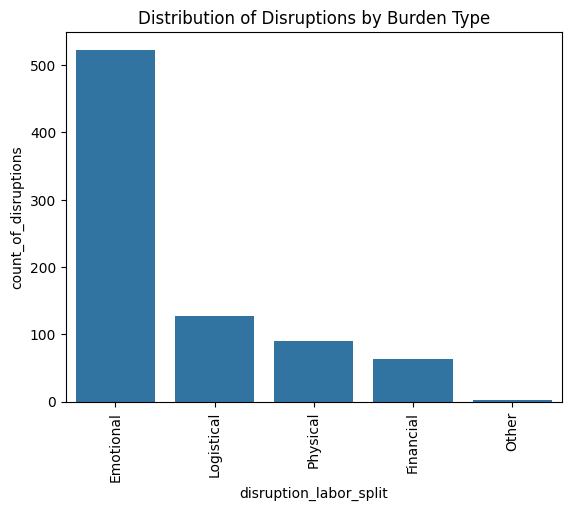

805

In [62]:
# @title

sns.barplot(x='disruption_labor_split', y='count_of_disruptions', data=burden_distribution)
plt.title('Distribution of Disruptions by Burden Type')
plt.xticks(rotation=90)
plt.show()

burden_distribution['count_of_disruptions'].sum()

### **#disruptions by type of labor for each type of disruption (are certain types of disruptions more impactful on goals)**

note -- not in document

In [63]:
# @title
disruption_labor_data = survey_data_exploded.groupby(['situation_that_occurred', 'disruption_labor_split']).size().unstack(fill_value=0)
disruption_labor_data

# disruption_labor_data['total'] = disruption_labor_data.sum(numeric_only=True, axis=1)
# disruption_labor_data['total'].sum()

disruption_labor_split,Emotional,Financial,Logistical,Other,Physical
situation_that_occurred,,,,,
Caregiving,13,0,6,0,0
Diet,11,0,4,1,5
Employment,14,3,4,0,0
Entertainment,10,1,1,0,0
Finances,83,46,19,0,1
Health,16,0,6,0,12
Housework,3,0,1,0,1
Internal - Feelings and thoughts,113,1,10,0,10
Internal-Skills,1,0,2,0,1


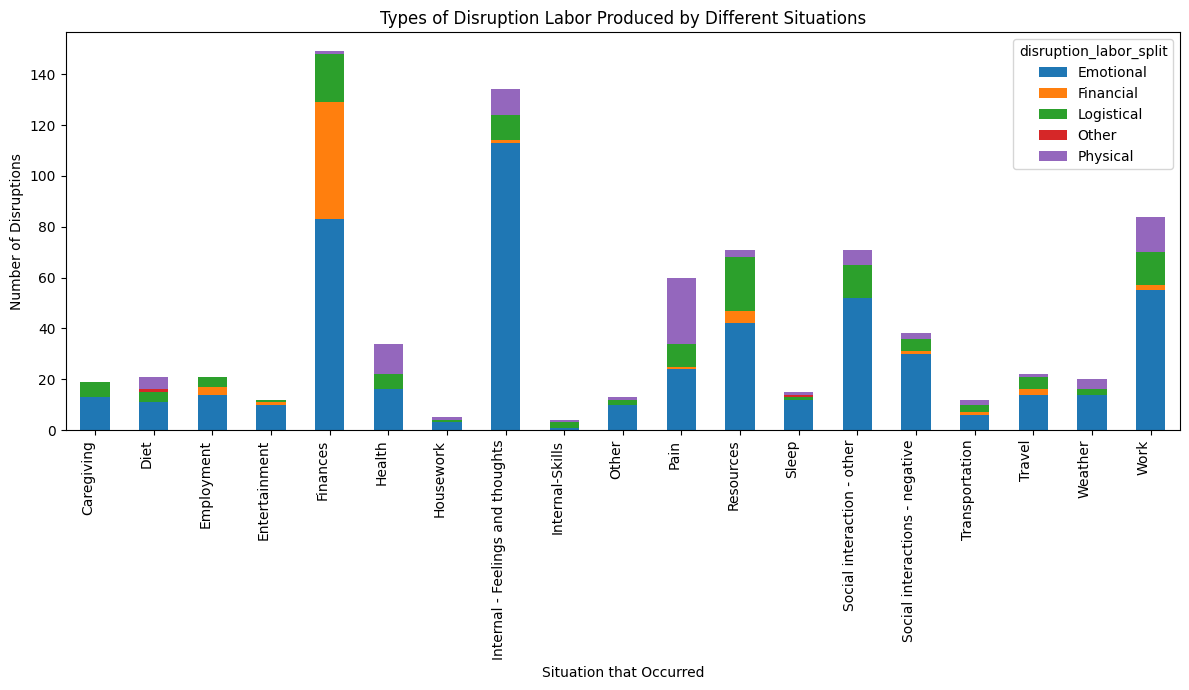

In [64]:
# @title
# Plot the stacked bar chart
disruption_labor_data.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Types of Disruption Labor Produced by Different Situations')
plt.xlabel('Situation that Occurred')
plt.ylabel('Number of Disruptions')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### **#disruptions by type of labor for each type of goal (are certain goal more impacted) 👍**

note -- not in document

🟣 EA notes 0909-11am:
*   what is  financial labor?  
*   financila labor only comes up for finances, but not much othrwise
*   logistical labor comes up consistently as 1/3 of the emotional labor count, for education, health, social connection, work. there's kind of a consistent breakdown
*   logistical labor seems to be a bit less for nutrition goal, compared to emotional labor (but we can't say it's significant unless we run a stats analysis)



In [65]:
# @title
disruption_labor_goal_data = survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split']).size().unstack(fill_value=0)
disruption_labor_goal_data

# disruption_labor_goal_data['total'] = disruption_labor_goal_data.sum(numeric_only=True, axis=1)
# disruption_labor_goal_data['total'].sum()

disruption_labor_split,Emotional,Financial,Logistical,Other,Physical
goal_categories,,,,,
Education/Learning,24,0,7,0,2
Finance,92,49,28,0,9
Health - other,26,3,11,0,10
Manage chronic condition,3,0,1,0,0
Mental health and wellbeing,84,1,14,1,7
Nutrition,38,2,7,0,8
Other,24,1,4,0,5
Physical Activity,53,0,9,0,22
Recreation,8,1,3,0,3


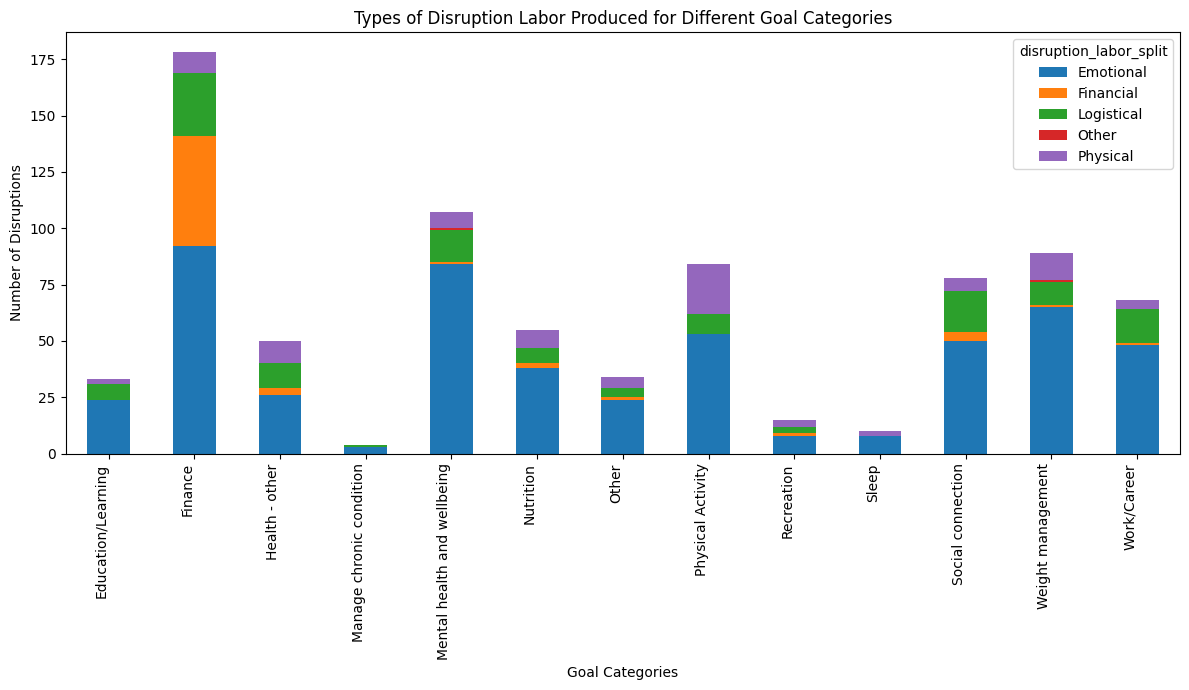

In [66]:
# @title
# Plot the stacked bar chart
disruption_labor_goal_data.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Types of Disruption Labor Produced for Different Goal Categories')
plt.xlabel('Goal Categories')
plt.ylabel('Number of Disruptions')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### **#disruptions by impact on goal/goal adjustment 🤔**


🟣 EA notes 0909-11am
*   what is under changed strategy? it's a really really large number! did we code at all any subcategories?


note -- not in document


xx disruptions caused people to change strategy, etc etc

In [67]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']

adjustment_distribution = disruption_data.groupby('goal_changes').size()
adjustment_distribution = adjustment_distribution.reset_index(name='count_of_disruptions')

adjustment_distribution = adjustment_distribution.sort_values(by='count_of_disruptions', ascending=False)
adjustment_distribution

,goal_changes,count_of_disruptions
1,Changed strategy,321
7,Skipped,157
2,Changed time,56
3,No change,48
5,Paused,39
0,Abandoned,32
6,Rescheduled,28
4,Other,2


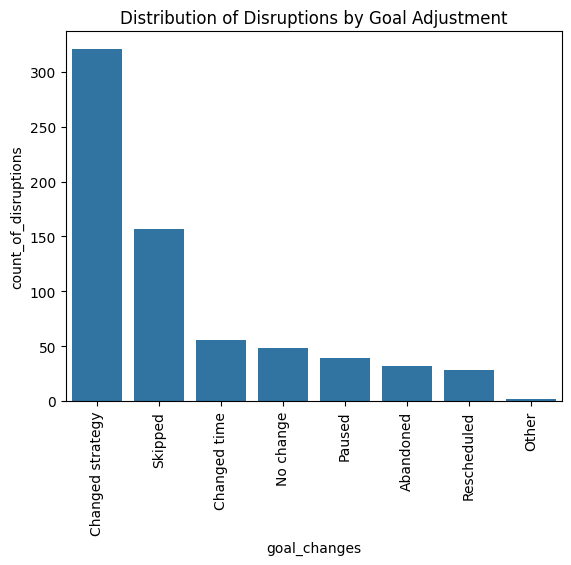

683

In [68]:
# @title
sns.barplot(x='goal_changes', y='count_of_disruptions', data=adjustment_distribution)
plt.title('Distribution of Disruptions by Goal Adjustment')
plt.xticks(rotation=90)
plt.show()


adjustment_distribution['count_of_disruptions'].sum()

### **#disruptions by impact on goal/goal adjustment for each type of disruption (are certain types of disruptions more impactful on goals)**




What types of disruption categories are more or less likely to produce changes in engagement time  vs changes in strategy?







In [69]:
# @title
adjustment_disruption_data = disruption_data.groupby(['situation_that_occurred', 'goal_changes']).size().unstack(fill_value=0)
adjustment_disruption_data

# adjustment_disruption_data['total'] = adjustment_disruption_data.sum(numeric_only=True, axis=1)
# adjustment_disruption_data['total'].sum()

goal_changes,Abandoned,Changed strategy,Changed time,No change,Other,Paused,Rescheduled,Skipped
situation_that_occurred,,,,,,,,
Caregiving,2,5,3,1,0,3,2,3
Diet,0,14,1,0,0,0,1,2
Employment,2,7,2,1,0,3,0,2
Entertainment,0,4,0,2,0,0,0,7
Finances,9,48,12,12,0,9,3,23
Health,0,12,1,0,0,6,0,2
Housework,0,0,2,0,0,0,1,1
Internal - Feelings and thoughts,10,71,4,8,0,6,2,31
Internal-Skills,0,0,0,2,0,0,0,1


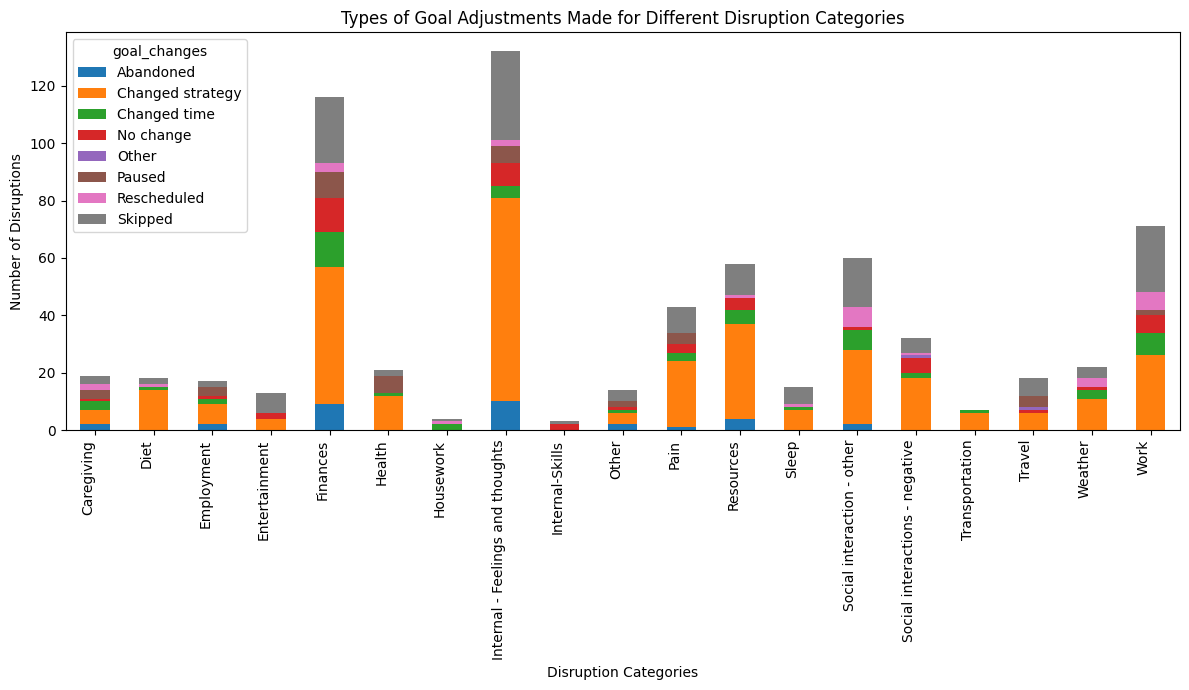

In [70]:
# @title
# Plot the stacked bar chart
adjustment_disruption_data.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Types of Goal Adjustments Made for Different Disruption Categories')
plt.xlabel('Disruption Categories')
plt.ylabel('Number of Disruptions')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### **#disruptions by impact on goal/goal adjustment for each type of goal (are certain goal more impacted) 👍**




What types of goal categories are more or less likely to produce changes in engagement time  vs changes in strategy?


🟣 EA notes 0909-11am
*   I am unsure what is the difference between pause and skip; can those just be merged or am I missing something?
*   is change time about change duration? if not, maybe it's intended to be merged with rescheduled?
*   if change time is about changing duration, then that's a change in strategy;
*   going back to change strategy again -- that is so massive, we need to unpack what is under there

🟣 EA things we learn from this:
*   as I try to interpret I definitely see how pause and skipped maybe should be merge, and unpacked... it does look like only finance has paused; some of health, so what's under there?


In [71]:
# @title
adjustment_goal_data = disruption_data.groupby(['goal_categories', 'goal_changes']).size().unstack(fill_value=0)
adjustment_goal_data

# adjustment_goal_data['total'] = adjustment_goal_data.sum(numeric_only=True, axis=1)
# adjustment_goal_data['total'].sum()

goal_changes,Abandoned,Changed strategy,Changed time,No change,Other,Paused,Rescheduled,Skipped
goal_categories,,,,,,,,
Education/Learning,0,15,1,0,0,0,2,9
Finance,9,51,16,13,1,13,1,25
Health - other,0,18,4,3,0,7,2,6
Manage chronic condition,0,4,0,0,0,0,1,0
Mental health and wellbeing,2,48,7,10,0,4,2,18
Nutrition,0,29,0,4,0,0,0,21
Other,3,14,3,5,0,1,3,8
Physical Activity,0,33,10,2,0,2,5,31
Recreation,5,6,1,0,0,1,0,2


In [72]:
# @title


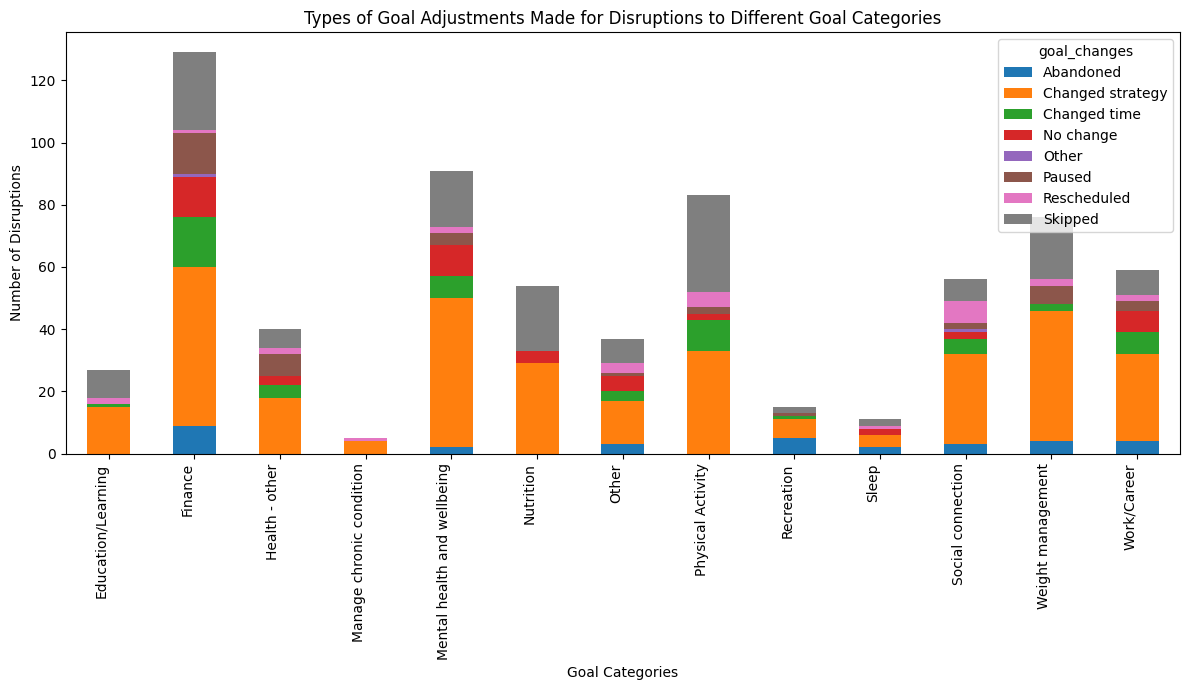

In [73]:
# @title
# Plot the stacked bar chart
adjustment_goal_data.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Types of Goal Adjustments Made for Disruptions to Different Goal Categories')
plt.xlabel('Goal Categories')
plt.ylabel('Number of Disruptions')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### **#disruptions by goal adjustments for different frequencies**

What types of goal changes were made for different disruption frequencies?

Of the XXX times goals were changed (strategy change + time change), ZZ were from daily disruptions, ZZ were from weekly disruptions etc. Of the XXX times time of engagement with goals were changed (paused + skipped + rescheduled + abandoned), ZZ were from daily disruptions, ZZ were from weekly disruptions etc.

* **YES** - Table of count of disruption of types of changes vs disruption frequency
* **YES** - EXCLUDING pre-existing disruptions
Filters: filter out rows with
  * **YES** - disruption = “no disruption”
  * **YES** - OR labor produced = No labor- positive disruption,
  * **YES** - OR how-long = no disruption
  * **YES** - exclude changes= “no response” or "other",
  * **YES** - exclude frequency =”no response”


In [74]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

adjustment_disruption__frequencies_data = disruption_data.groupby(['goal_changes', 'frequency']).size().unstack(fill_value=0)
adjustment_disruption__frequencies_data = adjustment_disruption__frequencies_data[frequency_order]
adjustment_disruption__frequencies_data
# adjustment_disruption__frequencies_data['total'] = adjustment_disruption__frequencies_data.sum(numeric_only=True, axis=1)
# adjustment_disruption__frequencies_data['total'].sum()

frequency,daily,weekly,every other week,monthly,every 6 months,yearly or less
goal_changes,,,,,,
Abandoned,9,4,1,1,4,1
Changed strategy,74,64,32,52,18,17
Changed time,8,13,6,13,8,6
No change,16,6,4,4,2,4
Paused,5,9,1,9,5,7
Rescheduled,2,5,6,8,4,1
Skipped,26,44,14,33,15,12


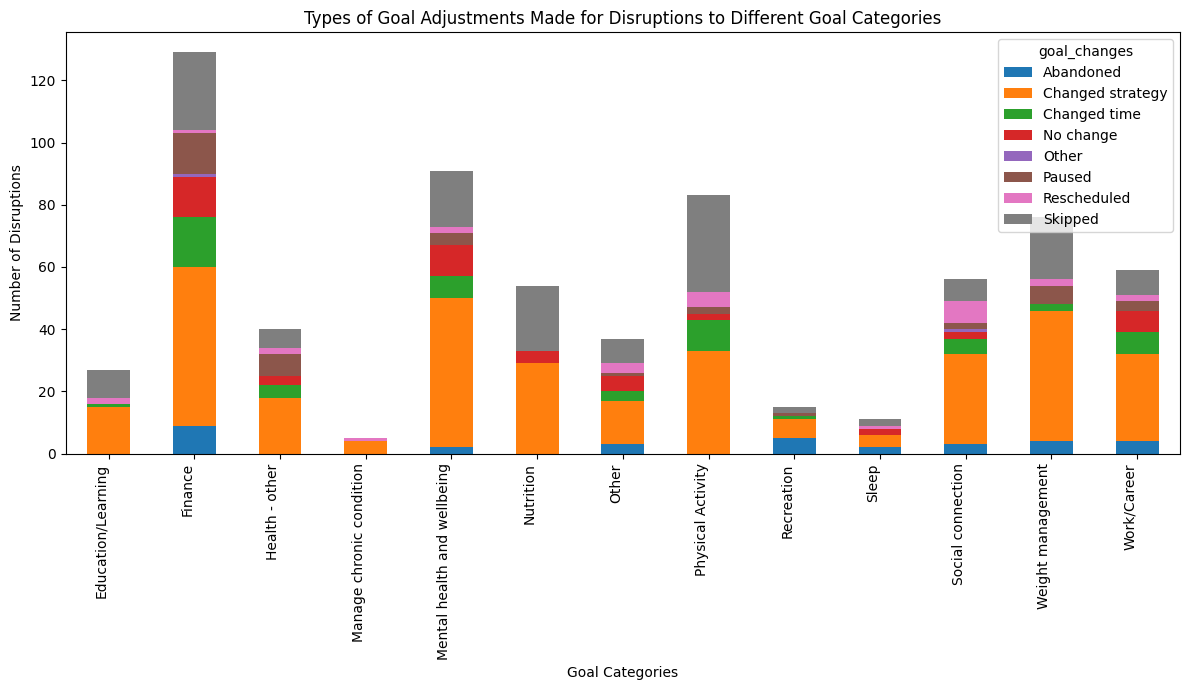

In [75]:
# @title
# Plot the stacked bar chart
adjustment_goal_data.plot(kind='bar', stacked=True, figsize=(12, 7))

# Add labels and title
plt.title('Types of Goal Adjustments Made for Disruptions to Different Goal Categories')
plt.xlabel('Goal Categories')
plt.ylabel('Number of Disruptions')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

### **#disruptions by goal adjustments for different durations**

What types of goal changes were made for different disruption duration?

Of the XXX times goals were changed (strategy change + time change), ZZ were from disruptions lasting less than a day, ZZ were from disruptions lasting a week etc. Of the XXX times time of engagement with goals were changed (paused + skipped + rescheduled + abandoned), ZZ were from disruptions lasting less than a day, ZZ were from disruptions lasting a week etc. Of the XXX times no changes were made to goals , ZZ were from disruptions lasting less than a day, ZZ were from disruptions lasting a week etc.


* **YES** - Table of count of disruption for types of changes vs disruption duration with under each category
* **YES** - EXCLUDING pre-existing disruptions

Filters: filter out rows with
  * **YES** - disruption = “no disruption”
  * **YES** - OR labor produced = No labor- positive disruption,
  * **YES** - OR how-long = no-disruption
  * **YES** - exclude changes= “no response” OR “other”,
  * **YES** - exclude duration =”no response”


In [76]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['pre-existing?'] != 'Yes']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'Other']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']


duration_order = ['an hour or less', 'more than an hour to half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

adjustment_disruption__duration_data = disruption_data.groupby(['goal_changes', 'how-long']).size().unstack(fill_value=0)
adjustment_disruption__duration_data = adjustment_disruption__duration_data[duration_order]
adjustment_disruption__duration_data

# adjustment_disruption__duration_data['total'] = adjustment_disruption__duration_data.sum(numeric_only=True, axis=1)
# adjustment_disruption__duration_data['total'].sum()

how-long,an hour or less,more than an hour to half a day,more than half a day to a day,multiple days to a week,multiple weeks to a month,multiple months to a year,longer than a year
goal_changes,,,,,,,
Abandoned,0,0,1,5,6,5,3
Changed strategy,16,25,29,68,45,41,33
Changed time,6,7,11,7,6,13,4
No change,1,2,2,8,5,10,8
Paused,1,1,1,12,11,7,3
Rescheduled,2,8,7,4,4,1,0
Skipped,12,32,28,39,17,10,6


### **#participants by disruption types 👍 **


* **count of each type reported:** how many unique times participants reported finance, etc etc
* **conditions:**
  * independent of disruption / no disruption
  * unique

  XX participants atleast once reported financial disruptions etc..

* Out of 149 participants, XX (ZZ%) reported financial disruptions, YY (ZZ%) reported  internal-feelings and thoughts disruptions, etc.
* Table of disruption categories (situations that occurred) with number of participants reported under each category, in the third column report number as a % of the total participants.
* **Validation**: total number of participants should be 149, total % should be 100. These are unique participants.
* **Filters**: filter out rows with disruption = “no disruption” OR labor produced = No labor- positive disruption, include rows with disruption labor = no response because it is still a disruption


-- add third column with %



In [77]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'situation_that_occurred'])

disruption_distribution = disruption_data.groupby('situation_that_occurred')['pid'].count().reset_index(name='participant_count')

disruption_distribution['participant_count'].sum()
disruption_distribution = disruption_distribution.sort_values(by='participant_count', ascending=False)
disruption_distribution


,situation_that_occurred,participant_count
4,Finances,66
7,Internal - Feelings and thoughts,66
18,Work,51
13,Social interaction - other,47
11,Resources,46
10,Pain,37
14,Social interactions - negative,22
17,Weather,20
5,Health,18
1,Diet,16


In [78]:
# @title


same table as above but some categories combined

In [79]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
temp_df = disruption_data

temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({
    'Internal-Skills': 'Internal- Emotional and Cognitive',
    'Internal - Feelings and thoughts': 'Internal- Emotional and Cognitive',
    'Social interaction - other': 'Social interaction',
    'Social interactions - negative': 'Social interaction',
    'Pain': 'Health',
    'Entertainment': 'Recreation',
    'Travel': 'Recreation',
    'Housework': 'Family and home responsibilities',
    'Caregiving': 'Family and home responsibilities',
    'Diet': 'Eating and sleeping issues',
    'Sleep': 'Eating and sleeping issues',
    'Transportation': 'Resources',
})

disruption_data = temp_df.drop_duplicates(subset = ['pid', 'situation_that_occurred'])

disruption_distribution = disruption_data.groupby('situation_that_occurred')['pid'].count().reset_index(name='participant_count')

disruption_distribution['participant_count'].sum()
disruption_distribution = disruption_distribution.sort_values(by='participant_count', ascending=False)
disruption_distribution


<ipython-input-79-785c9f538be1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['situation_that_occurred'] = temp_df['situation_that_occurred'].replace({


,situation_that_occurred,participant_count
5,Internal- Emotional and Cognitive,68
3,Finances,66
9,Social interaction,61
8,Resources,52
4,Health,51
11,Work,51
0,Eating and sleeping issues,28
7,Recreation,24
10,Weather,20
2,Family and home responsibilities,17


### **#participants by disruption frequency (how many people are impacted how frequently)**

note -- validation can't be 149 since each participant can report multiple frequencies for one circumstance

Out of 149 participants, XX (ZZ%) reported daily disruptions, YY (ZZ%) reported weekly disruptions l etc.
* Table and bar chart of frequency with number of participants reported under each category of disruption, in the third column report number as a % of the total participants.
* Validation: total number of participants should be 149, total % should be 100. These are unique participants.
* Filters: filter out rows with disruption = “no disruption” OR labor produced = No labor- positive disruption, include rows with disruption labor = no response because it is still a disruption, filter out rows with frequency= “no response”  
* Sort table based on frequency order – most often to least often (don’t sort by # of participants)


In [80]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']

# disruption_data
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'frequency'])

disruption_frequency = disruption_data[['pid', 'gid', 'circumstance', 'situation_that_occurred', 'frequency' ]]

disruption_frequency

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

frequency_distribution = disruption_frequency.groupby('frequency')['pid'].nunique().reset_index(name='participant_count')

frequency_distribution['frequency'] = pd.Categorical(frequency_distribution['frequency'], categories=frequency_order, ordered=True)

# Sort by the custom frequency order
frequency_distribution = frequency_distribution.sort_values(by='frequency')

frequency_distribution['participant_count'].sum()
frequency_distribution

,frequency,participant_count
0,daily,65
4,weekly,91
2,every other week,46
3,monthly,65
1,every 6 months,40
5,yearly or less,34


same as above but combining every 6 months and yearly or less

In [81]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']

# disruption_data
frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'frequency'])

disruption_frequency = disruption_data[['pid', 'gid', 'circumstance', 'situation_that_occurred', 'frequency' ]]

disruption_frequency['frequency'] = disruption_frequency['frequency'].replace({
     'every 6 months': '6 months or lesser',
     'yearly or less': '6 months or lesser',
})

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', '6 months or lesser']

frequency_distribution = disruption_frequency.groupby('frequency')['pid'].nunique().reset_index(name='participant_count')

frequency_distribution['frequency'] = pd.Categorical(frequency_distribution['frequency'], categories=frequency_order, ordered=True)

# Sort by the custom frequency order
frequency_distribution = frequency_distribution.sort_values(by='frequency')

frequency_distribution['participant_count'].sum()
frequency_distribution

<ipython-input-81-e42439e77d58>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disruption_frequency['frequency'] = disruption_frequency['frequency'].replace({


,frequency,participant_count
1,daily,65
4,weekly,91
2,every other week,46
3,monthly,65
0,6 months or lesser,66


### **#participants by disruption frequency for each type of disruption (how many people experience frequent disruptions of certain types)**


In [82]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'situation_that_occurred','frequency'])

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', 'every 6 months', 'yearly or less']

situation_frequency = disruption_data.groupby(['situation_that_occurred', 'frequency'])['pid'].count().unstack(fill_value=0)
# situation_frequency['total'] = situation_frequency.sum(numeric_only=True, axis=1)
# situation_frequency['total'].sum()
situation_frequency = situation_frequency[frequency_order]
situation_frequency.index.name = '#participants'
situation_frequency

frequency,daily,weekly,every other week,monthly,every 6 months,yearly or less
#participants,,,,,,
Caregiving,7,5,1,0,1,2
Diet,6,3,1,3,2,1
Employment,7,3,0,3,1,1
Entertainment,3,4,0,4,1,2
Finances,16,11,10,25,14,15
Health,6,3,0,5,2,4
Housework,0,1,1,2,0,0
Internal - Feelings and thoughts,28,31,7,11,3,2
Internal-Skills,3,1,0,0,0,0


same as above but combining categories and frequency to 6 months or lesser

In [83]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'situation_that_occurred','frequency'])
#combining
disruption_data['frequency'] = disruption_data['frequency'].replace({
     'every 6 months': '6 months or lesser',
     'yearly or less': '6 months or lesser',
})

disruption_data['situation_that_occurred'] = disruption_data['situation_that_occurred'].replace({
    'Internal-Skills': 'Internal- Emotional and Cognitive',
    'Internal - Feelings and thoughts': 'Internal- Emotional and Cognitive',
    'Social interaction - other': 'Social interaction',
    'Social interactions - negative': 'Social interaction',
    'Pain': 'Health',
    'Entertainment': 'Recreation',
    'Travel': 'Recreation',
    'Housework': 'Family and home responsibilities',
    'Caregiving': 'Family and home responsibilities',
    'Diet': 'Eating and sleeping issues',
    'Sleep': 'Eating and sleeping issues',
    'Transportation': 'Resources',
})


frequency_order = ['daily', 'weekly', 'every other week', 'monthly', '6 months or lesser']
situation_frequency = disruption_data.groupby(['situation_that_occurred', 'frequency'])['pid'].count().unstack(fill_value=0)
# situation_frequency['total'] = situation_frequency.sum(numeric_only=True, axis=1)
# situation_frequency['total'].sum()
situation_frequency = situation_frequency[frequency_order]
situation_frequency.index.name = '#participants'
situation_frequency

frequency,daily,weekly,every other week,monthly,6 months or lesser
#participants,,,,,
Eating and sleeping issues,10,10,2,5,3
Employment,7,3,0,3,2
Family and home responsibilities,7,6,2,2,3
Finances,16,11,10,25,29
Health,15,14,7,13,13
Internal- Emotional and Cognitive,31,32,7,11,5
Other,4,3,1,3,2
Recreation,4,6,0,6,10
Resources,17,16,7,11,12


### **#participants by disruption frequency for each type of goal**

In [84]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['frequency'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'goal_categories', 'frequency'])
disruption_data['frequency'] = disruption_data['frequency'].replace({
     'every 6 months': '6 months or lesser',
     'yearly or less': '6 months or lesser',
})
frequency_goal = disruption_data[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'frequency']]

frequency_order = ['daily', 'weekly', 'every other week', 'monthly', '6 months or lesser']

goal_frequency = frequency_goal.groupby(['goal_categories', 'frequency'])['pid'].count().unstack(fill_value=0)
goal_frequency['total'] = goal_frequency.sum(numeric_only=True, axis=1)
goal_frequency['total'].sum()
goal_frequency = goal_frequency[frequency_order]
goal_frequency.index.name = '#participants'
goal_frequency

frequency,daily,weekly,every other week,monthly,6 months or lesser
#participants,,,,,
Education/Learning,1,8,3,5,3
Finance,16,12,9,24,36
Health - other,6,8,4,6,7
Manage chronic condition,1,0,0,0,1
Mental health and wellbeing,12,25,12,8,6
Nutrition,7,16,5,8,6
Other,11,7,4,6,3
Physical Activity,13,21,11,13,9
Recreation,2,3,0,2,5


### **#participants by disruption duration (how many people are impacted for long times)**

Out of 149 participants, XX (ZZ%) reported disruptions lasting less than an hour, YY (ZZ%) reported disruptions lasting half a day etc.

* Table of duration (how long) with number of participants reported under each category,
* in the third column report number as a % of the total participants.

Validation: total number of participants should be 149, total % should be 100. These are unique participants.

Filters: filter out rows
* with disruption = “no disruption”
* OR labor produced = No labor- positive disruption,
* include rows with disruption labor = no response because it is still a disruption,
* filter out rows with duration = “no response”  OR containing “no disruption”

* Sort table based on duration order – smallest duration to longest (don’t sort by # of participants)



In [85]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'how-long'])

duration_data = disruption_data[['pid', 'gid', 'pid*gid*cid', 'circumstance', 'goal_categories','situation_that_occurred', 'how-long' ]]

# duration_data['how-long'] = duration_data['how-long'].replace({
#     'an hour or less': 'half a day',
#     'more than an hour to half a day': 'half a day',
# })

duration_order = ['an hour or less', 'more than an hour to half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']


duration_distribution = duration_data.groupby('how-long')['pid'].count().reset_index(name='participant_count')

duration_distribution['how-long'] = pd.Categorical(duration_distribution['how-long'], categories=duration_order, ordered=True)


duration_distribution = duration_distribution.sort_values(by='how-long')

# duration_distribution['participant_count'].sum()
duration_distribution

,how-long,participant_count
0,an hour or less,25
2,more than an hour to half a day,40
3,more than half a day to a day,49
4,multiple days to a week,83
6,multiple weeks to a month,60
5,multiple months to a year,56
1,longer than a year,38



Generate the above table but combine less than an hour + more than an hour but less than half a day.





In [86]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'how-long'])

duration_data = disruption_data[['pid','situation_that_occurred', 'how-long' ]]

duration_data['how-long'] = duration_data['how-long'].replace({
    'an hour or less': 'half a day',
    'more than an hour to half a day': 'half a day',
})


duration_order = ['half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']


duration_distribution = duration_data.groupby('how-long')['pid'].count().reset_index(name='participant_count')

duration_distribution['how-long'] = pd.Categorical(duration_distribution['how-long'], categories=duration_order, ordered=True)


duration_distribution = duration_distribution.sort_values(by='how-long')

duration_distribution

<ipython-input-86-d686666d6a5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_data['how-long'] = duration_data['how-long'].replace({


,how-long,participant_count
0,half a day,65
2,more than half a day to a day,49
3,multiple days to a week,83
5,multiple weeks to a month,60
4,multiple months to a year,56
1,longer than a year,38


Generate the above table but combine less than an hour + more than an hour to half a day and multiple months to a year + longer than a year

Generate the above table but combine less than an hour + more than an hour to half a day + more than half a day to a day

> Add blockquote


Sort table based on duration order – smallest duration to longest (don’t sort by # of participants)

In [87]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'how-long'])

duration_data = disruption_data[['pid', 'gid', 'pid*gid*cid', 'circumstance', 'goal_categories','situation_that_occurred', 'how-long' ]]

duration_data['how-long'] = duration_data['how-long'].replace({
    'an hour or less': 'a day',
    'more than an hour to half a day': 'a day',
    'more than half a day to a day': 'a day'
})

duration_order = ['a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']


duration_distribution = duration_data.groupby('how-long')['pid'].count().reset_index(name='participant_count')

duration_distribution['how-long'] = pd.Categorical(duration_distribution['how-long'], categories=duration_order, ordered=True)


duration_distribution = duration_distribution.sort_values(by='how-long')

duration_distribution

<ipython-input-87-0523851a54d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_data['how-long'] = duration_data['how-long'].replace({


,how-long,participant_count
0,a day,114
2,multiple days to a week,83
4,multiple weeks to a month,60
3,multiple months to a year,56
1,longer than a year,38


### **#participants by disruption duration for each type of goal (how many people experience long disruptions for certain types of goals)**

In [88]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'goal_categories', 'how-long'])
disruption_data['how-long'] = disruption_data['how-long'].replace({
    'an hour or less': 'half a day',
    'more than an hour to half a day': 'half a day',
})
duration_order = ['half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

duration_goal = disruption_data[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'how-long']]

goal_duration = duration_goal.groupby(['goal_categories', 'how-long'])['pid'].count().unstack(fill_value=0)
# goal_duration['total'] = goal_duration.sum(numeric_only=True, axis=1)
# goal_duration['total'].sum()
goal_duration = goal_duration[duration_order]
goal_duration.index.name = '#participants'
goal_duration

how-long,half a day,more than half a day to a day,multiple days to a week,multiple weeks to a month,multiple months to a year,longer than a year
#participants,,,,,,
Education/Learning,9,5,1,2,3,0
Finance,4,6,19,25,24,20
Health - other,3,6,7,3,7,1
Manage chronic condition,0,1,0,0,0,1
Mental health and wellbeing,20,6,16,6,5,9
Nutrition,9,6,12,4,3,6
Other,5,3,3,7,5,8
Physical Activity,16,14,27,9,5,3
Recreation,0,0,3,3,5,1


In [89]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['how-long'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'situation_that_occurred', 'how-long'])
disruption_data['how-long'] = disruption_data['how-long'].replace({
    'an hour or less': 'half a day',
    'more than an hour to half a day': 'half a day',
})


disruption_data['situation_that_occurred'] =  disruption_data['situation_that_occurred'].replace({
    'Internal-Skills': 'Internal- Emotional and Cognitive',
    'Internal - Feelings and thoughts': 'Internal- Emotional and Cognitive',
    'Social interaction - other': 'Social interaction',
    'Social interactions - negative': 'Social interaction',
    'Pain': 'Health',
    'Entertainment': 'Recreation',
    'Travel': 'Recreation',
    'Housework': 'Family and home responsibilities',
    'Caregiving': 'Family and home responsibilities',
    'Diet': 'Eating and sleeping issues',
    'Sleep': 'Eating and sleeping issues',
    'Transportation': 'Resources',
})


duration_order = ['half a day', 'more than half a day to a day', 'multiple days to a week', 'multiple weeks to a month', 'multiple months to a year', 'longer than a year']

duration_disruption = disruption_data[['pid','situation_that_occurred', 'how-long']]

situation_duration = duration_disruption.groupby(['situation_that_occurred', 'how-long'])['pid'].count().unstack(fill_value=0)
# goal_duration['total'] = goal_duration.sum(numeric_only=True, axis=1)
# goal_duration['total'].sum()
situation_duration = situation_duration[duration_order]
situation_duration.index.name = '#participants'
situation_duration

how-long,half a day,more than half a day to a day,multiple days to a week,multiple weeks to a month,multiple months to a year,longer than a year
#participants,,,,,,
Eating and sleeping issues,6,7,6,5,3,4
Employment,0,0,3,2,6,5
Family and home responsibilities,2,3,5,4,3,3
Finances,5,3,14,26,24,21
Health,8,9,18,9,11,7
Internal- Emotional and Cognitive,19,12,25,13,11,15
Other,3,0,2,3,3,2
Recreation,6,3,10,6,2,0
Resources,10,7,15,10,10,9


### **#participants by impact on goal/goal adjustment (how many people do X adjustment to goal)**

What types of changes to goals were most commonly made?

EA: so you mean distribution of types of changes by participant count

* Also: divide the goal changes based on goal type
* Also: divide the goal changes by disruption type

Out of 149 participants, XX (ZZ%) reported goals that they skipped, YY (ZZ%) reported goals they paused etc.

* Table
* and bar chart of goal change with number of participants reported under each category,
* in the third column report number as a % of the total participants.

Validation: total number of participants should be 149, total % should be 100. These are unique participants.

Filters: filter out rows
* with disruption = “no disruption”
* OR labor produced = No labor- positive disruption,
* OR how-loing = no disruption
* include rows with disruption labor = no response because it is still a disruption,
* filter out rows with changes = “no response”  



In [90]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'goal_changes'])

adjustment_distribution = disruption_data.groupby('goal_changes')['pid'].count().reset_index(name='participant_count')

adjustment_distribution['participant_count'].sum()
adjustment_distribution = adjustment_distribution.sort_values(by='participant_count', ascending=False)
adjustment_distribution

,goal_changes,participant_count
1,Changed strategy,105
7,Skipped,76
2,Changed time,38
3,No change,27
5,Paused,26
6,Rescheduled,18
0,Abandoned,16
4,Other,2


### **#participants by impact on goal/goal adjustment for each type of goal (how many people do X adjustment to goal for certain goal types)**

In [91]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'goal_categories', 'goal_changes'])


adjustment_goal = disruption_data[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_changes']]

adjustment_goal = adjustment_goal.groupby(['goal_categories', 'goal_changes'])['pid'].count().unstack(fill_value=0)
# adjustment_goal['total'] = adjustment_goal.sum(numeric_only=True, axis=1)
# adjustment_goal['total'].sum()
adjustment_goal.index.name = '#participants'
adjustment_goal

goal_changes,Abandoned,Changed strategy,Changed time,No change,Other,Paused,Rescheduled,Skipped
#participants,,,,,,,,
Education/Learning,0,8,1,0,0,0,1,7
Finance,7,30,12,8,1,10,1,18
Health - other,0,11,4,3,0,3,1,4
Manage chronic condition,0,2,0,0,0,0,1,0
Mental health and wellbeing,2,20,7,7,0,2,2,14
Nutrition,0,18,0,3,0,0,0,15
Other,3,10,3,4,0,1,3,6
Physical Activity,0,26,9,1,0,2,5,19
Recreation,4,3,1,0,0,1,0,2


### **#participants by type of labor (how many people do X labor)**

In [92]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data.assign(disruption_labor_split=disruption_data['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')
disruption_data = disruption_data[disruption_data['disruption_labor_split'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'disruption_labor_split'])

labor_distribution = disruption_data.groupby('disruption_labor_split')['pid'].count().reset_index(name='participant_count')

labor_distribution['participant_count'].sum()
labor_distribution = labor_distribution.sort_values(by='participant_count', ascending=False)
labor_distribution

,disruption_labor_split,participant_count
0,Emotional,130
2,Logistical,59
4,Physical,55
1,Financial,46
3,Other,2


### **#participants by type of labor for each type of goal (how many people do X labor for certain goal types)**

In [93]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data.assign(disruption_labor_split=disruption_data['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')
disruption_data = disruption_data[disruption_data['disruption_labor_split'] != 'No response']
disruption_data = disruption_data.drop_duplicates(subset = ['pid', 'goal_categories', 'disruption_labor_split'])


labor_goal = disruption_data.groupby(['goal_categories', 'disruption_labor_split'])['pid'].count().unstack(fill_value=0)
# labor_goal['total'] = labor_goal.sum(numeric_only=True, axis=1)
# labor_goal['total'].sum()
labor_goal.index.name = '#participants'
labor_goal

disruption_labor_split,Emotional,Financial,Logistical,Other,Physical
#participants,,,,,
Education/Learning,14,0,6,0,2
Finance,51,37,19,0,8
Health - other,14,2,7,0,7
Manage chronic condition,1,0,1,0,0
Mental health and wellbeing,40,1,12,1,4
Nutrition,23,2,7,0,7
Other,15,1,4,0,4
Physical Activity,32,0,8,0,17
Recreation,6,1,2,0,2


### **#participants by no disruption**


How many participants reported goals with no disruptions? Table or simple answer enough. No need for chart

In [94]:
# @title
nodisruption_df = df[df['disruption_status'] == "No Disruption"]
disruption_df = df[df['disruption_status'] == "Disruption"]

How many participants reported goals with no disruptions (Total number of participants (unique participants) with 1 or more goals with no disruptions.)

36

In [95]:
# @title
# how many unique participants reported no disruptions
nodisruption_df['pid'].nunique()

36

Were there any participants all of whose goals had no disruptions? For example, i report 3 goals none of which have any disruptions

YES, 2

In [96]:
# @title
# participants who reported no disruption for ALL their goals

participants_all_no_disruption = df.groupby('pid').apply(
    lambda x: all(
        (x['disruption_status'] == "No Disruption") )
)

participants_all_no_disruption


participants_with_all_no_disruption = participants_all_no_disruption[participants_all_no_disruption == True]
participants_with_all_no_disruption

<ipython-input-96-113b5aa021d7>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  participants_all_no_disruption = df.groupby('pid').apply(


,0
pid,
S26,True
S73,True


In [97]:
# @title
participants_with_all_no_disruption.count()

2


How many goals (% of goals) had no disruptions.  For example XX% of 434 goals have no disruptions??

Or XX of 434 goals had no disruptions (pid*gid unique identifier)

11.085450346420323


In [98]:
# @title
nodisruption_df['pid*gid'].nunique()/df['pid*gid'].nunique() * 100

11.085450346420323

### **#goals by no burden produced**

How many goals were “disrupted” but participants reported that no burden was produced? What were the changes reported?

EA: this seems to overlap with #participants by no disruption



In [99]:
# @title
# disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = df.assign(disruption_labor_split=df['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')
disruption_data = disruption_data[disruption_data['disruption_labor_split'] == 'No labor- positive disruption']

disruption_data['pid*gid'].nunique()



18

In [100]:
# @title
output = disruption_data.groupby('goal_categories')['pid*gid'].nunique().reset_index(name='goal_with_no_burden')
# output['goal_with_no_burden'].sum()
output

,goal_categories,goal_with_no_burden
0,Education/Learning,1
1,Finance,1
2,Mental health and wellbeing,5
3,Nutrition,2
4,Physical Activity,4
5,Recreation,2
6,Social connection,1
7,Weight management,1
8,Work/Career,1


### **#disruptions by goal adjustment for labor types**

What types of goal changes were made for different disruption burden produced?

* Of the XXX times goals were changed (strategy change + time change), ZZ were from disruptions producing 1 type of labor (emotional or physical or financial or logistical), ZZ were from disruptions producing 2 types of labor (emotional and physical, emotional and physical, emotional and financial, emotional and logistical) etc.

* Table of count of disruptions for types of changes vs disruption labor number (1 only, 2 only, 3+)
* EXCLUDING pre-existing disruptions
* Filters: filter out rows with
  * disruption = “no disruption”
  * OR labor produced = No labor- positive disruption,
  * or how long = no disruption
  * exclude changes= “no response”,”



In [101]:
# @title
burden_goal = df[['pid','gid', 'pid*gid', 'pre-existing?', 'disruption_status', 'disruption_labor_aggregated', 'goal_changes']]
# burden_goal = burden_goal.assign(disruption_labor_split=burden_goal['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')

burden_goal = burden_goal[burden_goal['disruption_status'] == 'Disruption']
burden_goal = burden_goal[burden_goal['disruption_labor_aggregated'] != 'No response']
burden_goal = burden_goal[burden_goal['goal_changes'] != 'No response']
burden_goal = burden_goal[burden_goal['pre-existing?'] != 'Yes']



disruption_labor_split=burden_goal['disruption_labor_aggregated'].str.split(', ')
# disruption_labor_split['array_length'] = disruption_labor_split['disruption_labor_aggregated'].apply(len)
disruption_labor_split
burden_goal['disruption_labor_split'] = disruption_labor_split
burden_goal
burden_goal['array_length'] = burden_goal['disruption_labor_split'].apply(len)
burden_goal

burden_goal = burden_goal[['goal_changes', 'array_length']]
burden_goal.groupby(['goal_changes', 'array_length']).size().unstack(fill_value=0)

array_length,1,2,3
goal_changes,,,
Abandoned,17,1,0
Changed strategy,187,53,2
Changed time,31,15,4
No change,25,3,0
Other,1,0,1
Paused,21,9,2
Rescheduled,10,6,3
Skipped,100,24,7


In [102]:
# @title
burden_goal = df[['pid','gid', 'pid*gid', 'pre-existing?', 'disruption_status', 'disruption_labor_aggregated', 'goal_changes']]
burden_goal = burden_goal[burden_goal['disruption_status'] == 'Disruption']
burden_goal = burden_goal.assign(disruption_labor_split=burden_goal['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')
burden_goal = burden_goal[burden_goal['disruption_labor_split'] != 'No response']
burden_goal = burden_goal[burden_goal['goal_changes'] != 'No response']
burden_goal = burden_goal[burden_goal['pre-existing?'] != 'Yes']
output = burden_goal.groupby(['disruption_labor_split', 'goal_changes']).size().unstack(fill_value=0)
# output.reset_index(inplace=True)
#  output.sum(numeric_only=True).sum()
output

goal_changes,Abandoned,Changed strategy,Changed time,No change,Other,Paused,Rescheduled,Skipped
disruption_labor_split,,,,,,,,
Emotional,16,202,40,24,2,28,18,114
Financial,0,17,6,3,1,4,0,10
Logistical,2,42,16,2,1,6,9,29
Other,0,2,0,0,0,0,0,0
Physical,1,36,11,2,0,7,4,16


### **#disruptions by change time or change strategy**

 What types of disruptions are more or less likely to produce changes in engagement time vs changes in strategy?

In [103]:
# @title
changed_goals = df[df['goal_changes'].isin(['Changed strategy', 'Changed time'])]
changed_goals

changed_goals.groupby([ 'situation_that_occurred', 'goal_changes']).size().unstack(fill_value=0)


# changed_goals = changed_goals.groupby(['disruption_labor_split', 'goal_changes'])


goal_changes,Changed strategy,Changed time
situation_that_occurred,,
Caregiving,5,3
Diet,14,1
Employment,7,2
Entertainment,5,0
Finances,49,12
Health,12,1
Housework,0,2
Internal - Feelings and thoughts,71,4
No disruption,2,0


### **#goals by goal adjustments**

What types of changes to goals were most commonly made?

Out of 434 goals, XX (ZZ%) were skipped, YY (ZZ%) were paused, XX had more than 1 goal changes etc.

* Table and
* bar chart of changes with number of goals reported under each category,
* in the third column report number as a % of the total goals.

* Validation: total number of goals should be 434, total % should be 100.

NOTE: A goal can have multiple types of changes made to it depending on the disruption type. To answer this question, we need to create an array or list of changes made to a goal which contains unique of all changes made. Suppose p1 lists goal 1 which 3 disruptions, 2 disruptions result in them skipping the goal and 1 disruption results in changed strategy. So p1-g1’s goal changes = [skipped, changed strategy]

Filters: filter out rows with
* disruption = “no disruption”
* OR labor produced = No labor- positive disruption,
* OR how long = no disruption
* include rows with disruption labor = no response because it is still a disruption,
* filter out rows with changes= “no response”



In [104]:
# @title
disruption_data = df[df['disruption_status'] == 'Disruption']
disruption_data = disruption_data[disruption_data['goal_changes'] != 'No response']
goal_adjustment = disruption_data[['pid', 'gid', 'cid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_changes']]
goal_adjustment

goal_changes_grouped = goal_adjustment.groupby('pid*gid')['goal_changes'].apply(lambda x: list(set(x))).reset_index()
goal_changes_grouped

# Add a column that counts the number of unique changes for each goal
goal_changes_grouped['change_count'] = goal_changes_grouped['goal_changes'].apply(len)

goal_changes_grouped



,pid*gid,goal_changes,change_count
0,S01*goal1,"[Abandoned, Changed strategy]",2
1,S01*goal2,"[Changed strategy, No change]",2
2,S01*goal3,[Changed strategy],1
3,S01*goal4,"[Changed strategy, No change]",2
4,S01*goal5,[No change],1
...,...,...,...
378,S98*goal1,[No change],1
379,S98*goal2,"[Skipped, Changed strategy]",2
380,S99*goal1,"[Skipped, Changed strategy]",2
381,S99*goal2,[Changed strategy],1


In [105]:
# @title
goal_changes_grouped.groupby('change_count')['pid*gid'].nunique().reset_index(name='goal_count')

,change_count,goal_count
0,1,291
1,2,82
2,3,9
3,4,1


In [106]:
# @title
goal_adjustment.groupby('goal_changes')['pid*gid'].nunique().reset_index(name='goal_count')

,goal_changes,goal_count
0,Abandoned,26
1,Changed strategy,202
2,Changed time,49
3,No change,37
4,Other,2
5,Paused,29
6,Rescheduled,24
7,Skipped,117


### **#participants by disruption type and goal type**

In [107]:
# @title
disruptions_by_goal_type = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'circumstance', 'situation_that_occurred', 'disruption_status', 'life_event?', 'pre-existing?']]
disruptions_by_goal_type = disruptions_by_goal_type[disruptions_by_goal_type['disruption_status'] == 'Disruption']

disruptions_by_goal_type['situation_that_occurred'] = disruptions_by_goal_type['situation_that_occurred'].replace({
    'Internal-Skills': 'Internal- Emotional and Cognitive',
    'Internal - Feelings and thoughts': 'Internal- Emotional and Cognitive',
    'Social interaction - other': 'Social interaction',
    'Social interactions - negative': 'Social interaction',
    'Pain': 'Health',
    'Entertainment': 'Recreation',
    'Travel': 'Recreation',
    'Housework': 'Family and home responsibilities',
    'Caregiving': 'Family and home responsibilities',
    'Diet': 'Eating and sleeping issues',
    'Sleep': 'Eating and sleeping issues',
    'Transportation': 'Resources',
})

disruptions_by_goal_type = disruptions_by_goal_type.drop_duplicates(subset = ['pid', 'goal_categories', 'situation_that_occurred'])

disruption_by_category = disruptions_by_goal_type.groupby(['goal_categories', 'situation_that_occurred'])['pid'].nunique().unstack(fill_value=0)
disruption_by_category

situation_that_occurred,Eating and sleeping issues,Employment,Family and home responsibilities,Finances,Health,Internal- Emotional and Cognitive,Other,Recreation,Resources,Social interaction,Weather,Work
goal_categories,,,,,,,,,,,,
Education/Learning,0,0,2,1,1,7,0,4,3,2,0,3
Finance,0,5,2,52,8,7,2,5,6,5,0,4
Health - other,5,1,1,2,7,3,2,1,4,3,3,2
Manage chronic condition,1,0,0,0,1,1,0,0,0,1,0,0
Mental health and wellbeing,6,0,3,4,1,17,2,4,6,21,1,11
Nutrition,5,0,0,3,3,15,1,2,12,10,0,4
Other,2,1,2,4,2,6,1,1,5,2,0,8
Physical Activity,4,0,3,0,23,12,3,3,3,6,10,15
Recreation,0,0,0,5,0,1,1,0,2,0,2,1
